In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import numpy as np

np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

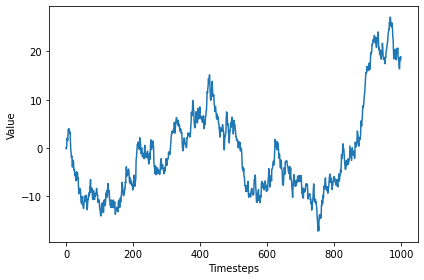

In [3]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/CH03_F01_peixeiro.png', dpi=300)

In [4]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.9659524876918751
p-value: 0.7654789696692581


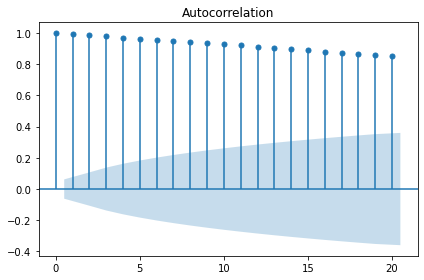

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20);

plt.tight_layout()
plt.savefig('figures/CH03_F02_peixeiro.png', dpi=300)

In [6]:
diff_random_walk = np.diff(random_walk, n=1)

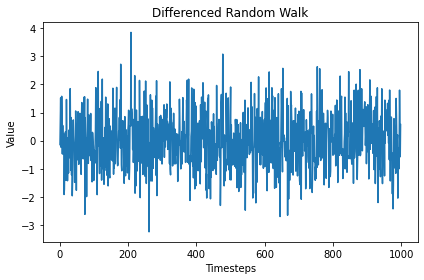

In [7]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()
plt.savefig('figures/CH03_F03_peixeiro.png', dpi=300)

In [8]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560615
p-value: 0.0


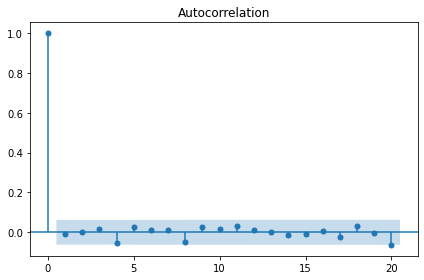

In [9]:
plot_acf(diff_random_walk, lags=20);

plt.tight_layout()
plt.savefig('figures/CH03_F04_peixeiro.png', dpi=300)

## Long horizon 

In [10]:
import pandas as pd

df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

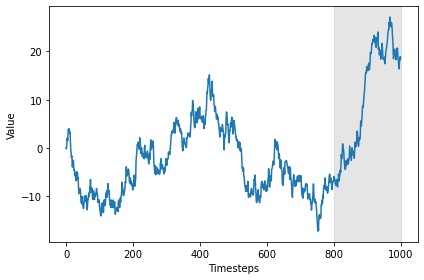

In [11]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()
plt.savefig('figures/CH03_F05_peixeiro.png', dpi=300)

### Mean 

In [12]:
mean = np.mean(train.value)
mean

-3.6772058069098823

In [13]:
pred_df = test.copy()
pred_df['pred_mean'] = mean

pred_df.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


### Last value 

In [14]:
last_value = train.iloc[-1].value
last_value

-6.814947499255865

In [15]:
pred_df['pred_last_value'] = last_value
pred_df.head()

,value,pred_mean,pred_last_value
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


### Drift 

In [16]:
deltaX = 800 - 0
deltaY = last_value - 0

drift = deltaY / deltaX

drift

-0.008518684374069831

In [17]:
x_vals = np.arange(801, 1001, 1)

pred_drift = drift * x_vals

pred_df['pred_drift'] = pred_drift

pred_df.head()

,value,pred_mean,pred_last_value,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.823466
801,-6.392708,-3.677206,-6.814947,-6.831985
802,-6.296588,-3.677206,-6.814947,-6.840504
803,-6.758863,-3.677206,-6.814947,-6.849022
804,-7.193359,-3.677206,-6.814947,-6.857541


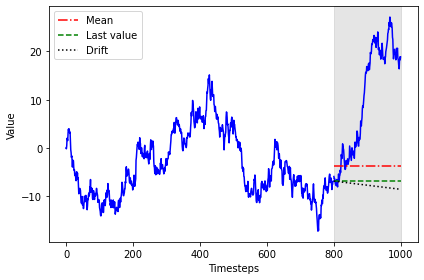

In [18]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(pred_df.value, 'b-')
ax.plot(pred_df.pred_mean, 'r-.', label='Mean')
ax.plot(pred_df.pred_last_value, 'g--', label='Last value')
ax.plot(pred_df.pred_drift, 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/CH03_F06_peixeiro.png', dpi=300)

In [19]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df.value, pred_df.pred_mean)
mse_last = mean_squared_error(pred_df.value, pred_df.pred_last_value)
mse_drift = mean_squared_error(pred_df.value, pred_df.pred_drift)

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 465.85546483209214


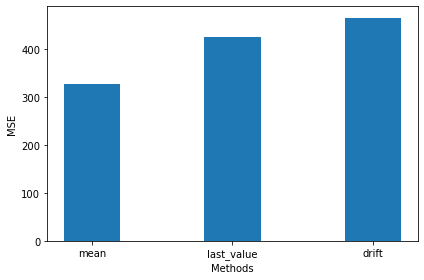

In [20]:
fig, ax = plt.subplots()

ax.bar(
    ['mean', 'last_value', 'drift'], 
    [mse_mean, mse_last, mse_drift], 
    width=0.4)

ax.set_xlabel('Methods')
ax.set_ylabel('MSE')

plt.tight_layout()

plt.savefig('figures/CH03_F07_peixeiro.png', dpi=300)

## Next timestep 

In [21]:
df_shift = df.shift(periods=1)
df_shift

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454
...,...
995,16.676509
996,16.395408
997,18.193095
998,18.833938


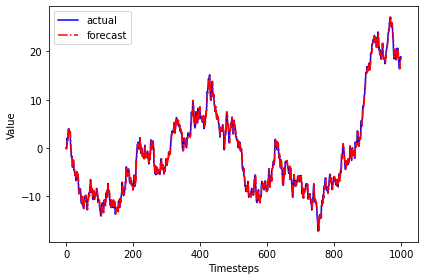

In [22]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

plt.savefig('figures/CH03_F09_peixeiro.png', dpi=300)

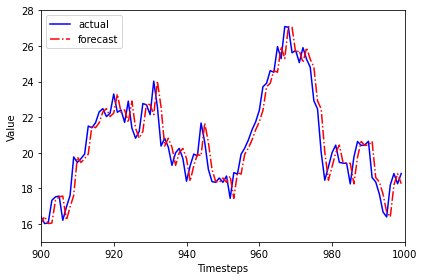

In [23]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

plt.savefig('figures/CH03_F10_peixeiro.png', dpi=300)

In [24]:
mse_one_step = mean_squared_error(pred_df.value, df_shift[800:])
mse_one_step

0.9256876651440581

## GOOGL - April 28, 2020 to April 27, 2021

In [135]:
df = pd.read_csv('data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


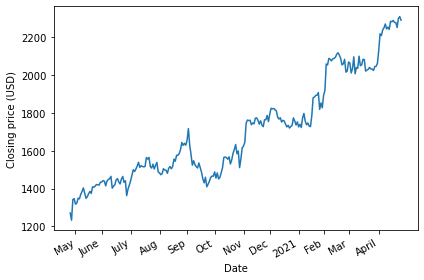

In [3]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.Close)
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH03_F1_peixeiro.png', dpi=300)

In [136]:
GOOGL_ADF_result = adfuller(df.Close)

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771316
p-value: 0.9699419435913057


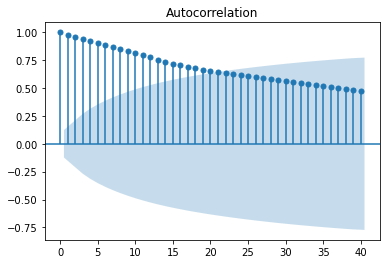

In [38]:
plot_acf(df['Close'], lags=40);

In [138]:
diff_close = np.diff(df['Close'], n=1)

In [139]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295223
p-value: 5.3865309614548296e-06


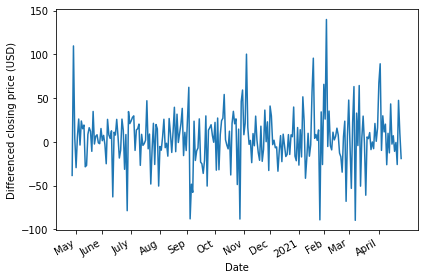

In [99]:
fig, ax = plt.subplots()

ax.plot(diff_close)
ax.set_xlabel('Date')
ax.set_ylabel('Differenced closing price (USD)')

plt.xticks(
    [3, 23, 45, 67, 88, 109, 131, 151, 173, 192, 211, 234], 
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 2021, 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

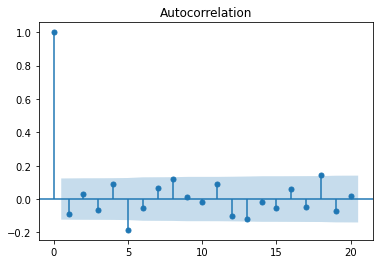

In [140]:
plot_acf(diff_close, lags=20);
plt.savefig('figures/CH03_F11_peixeiro.png', dpi=300)

In [96]:
ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.303439704295223
p-value: 5.3865309614548296e-06


## Simulate shock 

In [121]:
def simulate_shock(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10
        
    for i in range(100):
        process[i+1] = alpha*process[i] + np.random.standard_normal()
        
    process[100] = alpha*process[49] + np.random.standard_normal() + 10
    
    for i in range(100, 399):
        process[i+1] = alpha*process[i] + np.random.standard_normal()
        
    return process    

In [122]:
stationary_process = simulate_shock(is_stationary=True)
non_stationary_process = simulate_shock(is_stationary=False)

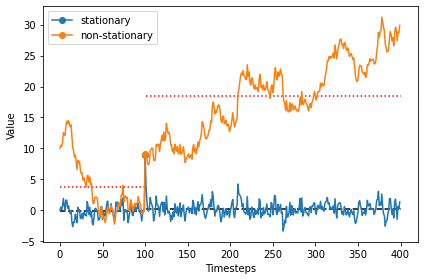

In [133]:
stationary_mean_before = np.mean(stationary_process[:100])
stationary_mean_after = np.mean(stationary_process[101:])

non_stationary_mean_before = np.mean(non_stationary_process[:100])
non_stationary_mean_after = np.mean(non_stationary_process[101:])

fig, ax = plt.subplots()

ax.plot(stationary_process, marker=".", markersize=12, markevery=[100], label="stationary")
ax.plot(non_stationary_process, marker=".", markersize=12, markevery=[100], label="non-stationary")

ax.hlines(y=stationary_mean_before, xmin=0, xmax=99, linestyle='--', color='black')
ax.hlines(y=stationary_mean_after, xmin=101, xmax=400, linestyle='--', color='black')

ax.hlines(y=non_stationary_mean_before, xmin=0, xmax=99, linestyle=':', color='red')
ax.hlines(y=non_stationary_mean_after, xmin=101, xmax=400, linestyle=':', color='red')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()
plt.savefig('figures/CH03_F6_peixeiro.png', dpi=300)

In [128]:
non_stationary_mean_before = np.mean(non_stationary_process[:100])
non_stationary_mean_after = np.mean(non_stationary_process[101:])

print(non_stationary_mean_before)
print(non_stationary_mean_after)

3.698664054823756
18.38587451638617
